<a href="https://colab.research.google.com/github/aksh98/Gender_Prediction_using_Handwriting/blob/master/Gender_prediction_using_handwriting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !pip install kaggle

In [0]:
# !export KAGGLE_USERNAME=aksh98
# !export KAGGLE_KEY=260ed3247d4ea89457e054b1cb1b9892
# {"username":"aksh98","key":"260ed3247d4ea89457e054b1cb1b9892"}

In [0]:
# !kaggle competitions download -c icdar2013-gender-prediction-from-handwriting

In [0]:
##  Source: 
# https://www.researchgate.net/profile/Marcus_Liwicki/publication/228777858_Automatic_Detection_of_Gender_and_Handedness_from_On-Line_Handwriting/links/0c9605327ee2f4267f000000.pdf
## 

# 2 Algorithms used:
# SVM - Classification
# GMM - Generative - to model the distribution of features of each class

In [0]:
from sklearn import svm
import pandas as pd
import numpy as np
import sklearn
import cv2
import os
from pandas import DataFrame as df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

print("Done")

Done


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%cd drive/My Drive/Colab Notebooks
%cd Assignments_sem7/
!ls
%cd IA_Project

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content/drive/My Drive/Colab Notebooks/Assignments_sem7/IA_Project
[Errno 2] No such file or directory: 'Assignments_sem7/'
/content/drive/My Drive/Colab Notebooks/Assignments_sem7/IA_Project
 101_150   451_475				       iris.data.rtf
 1_50	   51_100				       test_answers.csv
 151_200   chaincode.py				       test.csv
 201_250   curvatures.py			       train_answers.csv
 251_300   Features				       train.csv
 301_350   Gender_prediction_using_handwriting.ipynb   Try_image.jpg
 401_450  'IA Midterm Evaluation.gslides'
[Errno 2] No such file or directory: 'IA_Project'
/content/drive/My Drive/Colab Notebooks/Assignments_sem7/IA_Project


In [0]:
!ls

101_150  251_300  51_100				     train_answers.csv
1_50	 301_350  Gender_prediction_using_handwriting.ipynb  train.csv
151_200  401_450  test_answers.csv
201_250  451_475  test.csv


In [0]:
y_tt = pd.read_csv('test_answers.csv')
print(y_tt.head())
print("SIZE - ",y_tt.shape)
y_tt.drop(['Usage'],inplace = True, axis=1)
y_test = y_tt.loc[y_tt.index.repeat(4)].reset_index(drop=True)
y_test.drop(['writer'],inplace = True, axis=1)
print(y_test.shape)
y_test.head()

   writer  male        Usage
0     283     1  PrivateTest
1     284     0   PublicTest
2     285     0  PrivateTest
3     286     0   PublicTest
4     287     1   PublicTest
SIZE -  (193, 3)
(772, 1)


,male
0,1
1,1
2,1
3,1
4,0


In [0]:
%cd ..

/content/drive/My Drive/Colab Notebooks/Assignments_sem7/IA_Project


In [0]:
y_t = pd.read_csv('train_answers.csv')
# print(y_train.head())
print(y_t.shape)
print(y_t.head())
y_train = y_t.loc[y_t.index.repeat(4)].reset_index(drop=True)
print(y_train.shape)
print(y_train.head())
y_train.drop(['writer'],inplace = True, axis=1)
# y_train.shape
y_train.head()

(282, 2)
   writer  male
0       1     0
1       2     0
2       3     0
3       4     0
4       5     1
(1128, 2)
   writer  male
0       1     0
1       1     0
2       1     0
3       1     0
4       2     0


,male
0,0
1,0
2,0
3,0
4,0


In [0]:
# x_train.drop(data.iloc(,40:),axis=1,inplace=True)

SyntaxError: ignored

In [0]:
x_train = x_train.values
# x_train
print(x_train.shape)
x_train = x_train[400:800,0:40]
# x_train = x_train[:400,:]
# x_train = x_train[:,:40]

(1128, 7066)


In [0]:
print(x_train.shape)

(400, 40)


In [0]:
x_train = pd.read_csv('train.csv')
x_train.drop(['language'],inplace = True, axis=1)
x_train.drop(['writer','same_text','page_id'],inplace = True, axis=1)
x_train.shape

(1128, 7066)

In [0]:
x_train.head()

,tortuosityHist10[0],tortuosityHist10[1],tortuosityHist10[2],tortuosityHist10[3],tortuosityHist10[4],tortuosityHist10[5],tortuosityHist10[6],tortuosityHist10[7],tortuosityHist10[8],tortuosityHist10[9],...,directions_hist1a2a3a4a5a6a7a8a9a10_220[210],directions_hist1a2a3a4a5a6a7a8a9a10_220[211],directions_hist1a2a3a4a5a6a7a8a9a10_220[212],directions_hist1a2a3a4a5a6a7a8a9a10_220[213],directions_hist1a2a3a4a5a6a7a8a9a10_220[214],directions_hist1a2a3a4a5a6a7a8a9a10_220[215],directions_hist1a2a3a4a5a6a7a8a9a10_220[216],directions_hist1a2a3a4a5a6a7a8a9a10_220[217],directions_hist1a2a3a4a5a6a7a8a9a10_220[218],directions_hist1a2a3a4a5a6a7a8a9a10_220[219]
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.002457,0.002633,0.002698,0.002929,0.003014,0.003225,0.003572,0.003957,0.004232,0.004804
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.002498,0.002641,0.002836,0.002999,0.003246,0.003456,0.003709,0.003994,0.004308,0.004706
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.002090,0.002440,0.002831,0.003078,0.003438,0.003732,0.004100,0.004329,0.004687,0.004879
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.002435,0.002823,0.003117,0.003441,0.003788,0.004056,0.004285,0.004527,0.004843,0.005085
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.002465,0.002724,0.003079,0.003305,0.003425,0.003403,0.003450,0.003626,0.003977,0.004547


In [0]:
x_test = pd.read_csv('test.csv')
x_test.drop(['language'],inplace = True, axis=1)
x_test.drop(['writer','same_text','page_id'],inplace = True, axis=1)
x_test.shape

(772, 7066)

In [0]:
x_test.head()

,tortuosityHist10[0],tortuosityHist10[1],tortuosityHist10[2],tortuosityHist10[3],tortuosityHist10[4],tortuosityHist10[5],tortuosityHist10[6],tortuosityHist10[7],tortuosityHist10[8],tortuosityHist10[9],...,directions_hist1a2a3a4a5a6a7a8a9a10_220[210],directions_hist1a2a3a4a5a6a7a8a9a10_220[211],directions_hist1a2a3a4a5a6a7a8a9a10_220[212],directions_hist1a2a3a4a5a6a7a8a9a10_220[213],directions_hist1a2a3a4a5a6a7a8a9a10_220[214],directions_hist1a2a3a4a5a6a7a8a9a10_220[215],directions_hist1a2a3a4a5a6a7a8a9a10_220[216],directions_hist1a2a3a4a5a6a7a8a9a10_220[217],directions_hist1a2a3a4a5a6a7a8a9a10_220[218],directions_hist1a2a3a4a5a6a7a8a9a10_220[219]
0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.002271,0.002299,0.002386,0.002502,0.002622,0.002738,0.002817,0.002870,0.003048,0.003381
1,0.994351,0.005649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.002387,0.002451,0.002527,0.002613,0.002675,0.002746,0.002889,0.002945,0.003114,0.003291
2,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.002395,0.002636,0.002865,0.003035,0.003215,0.003402,0.003730,0.003870,0.004187,0.004385
3,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.002341,0.002563,0.002840,0.003072,0.003387,0.003650,0.003881,0.004138,0.004435,0.004678
4,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.002134,0.002426,0.002851,0.003184,0.003554,0.003918,0.004146,0.004530,0.004865,0.005171


In [0]:
x_train = x_train.values
y_train = y_train.values
y_train = y_train.ravel()
y_train = np.array(y_train).astype(int)
x_train = np.array(x_train).astype(float)
print(y_train.shape,x_train.shape)
print(np.dtype(x_train[0][0]))

(1128,) (1128, 7066)
float64


In [0]:
y_test = y_test.values
x_test = x_test.values

In [0]:
# parameters = {'kernel':('linear','rbf'),'C':[1,10,100,1000]}
# svc = svm.svc(gamma = 0.1)
# clf = GridSearchCV(svc,parameters,cv=5)

In [0]:
from sklearn.model_selection import GridSearchCV


parameters = {'kernel':('linear','rbf'),'C':[1,100,1000]}
svc = svm.SVC(gamma = 0.1)
clf = GridSearchCV(svc,parameters,cv=5)

# clf = svm.SVC(C = 100, gamma = 0.1,kernel='rbf')
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("accuracy: ",accuracy)

accuracy:  0.7072538860103627


In [0]:
tortuosity = range(40)					# 2
directionPerpendicular = range(40,50)	# 1
curvature = range(50,950)				# 4 Maybe LSVM
chainCode = range(950,5970)				# 3 Maybe LogR
directions = range(5970,7066)			# 5

In [0]:
from sklearn.ensemble import RandomForestClassifier

clsf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', criterion = 'gini', n_jobs = 2)
clsf.fit(x_train,y_train)
predict = clsf.predict(x_test) 
accuracy = accuracy_score(y_test,predict)
print("Accuracy:",accuracy)

Accuracy: 0.7046632124352331


## Using Our Features
 - Chaincode Features
 - Contour_direction_features
 - Contour Hinge Features
 - Curvature Features
 - Tortuosity
 - Edge Based
 

In [0]:
y_tt = pd.read_csv('test_answers.csv')
print(y_tt.head())
print("SIZE - ",y_tt.shape)
y_tt.drop(['Usage'],inplace = True, axis=1)
y_test = y_tt.loc[y_tt.index.repeat(4)].reset_index(drop=True)
y_test.drop(['writer'],inplace = True, axis=1)
print(y_test.shape)
y_test.head()

   writer  male        Usage
0     283     1  PrivateTest
1     284     0   PublicTest
2     285     0  PrivateTest
3     286     0   PublicTest
4     287     1   PublicTest
SIZE -  (193, 3)
(772, 1)


,male
0,1
1,1
2,1
3,1
4,0


In [0]:
%cd ..

/content/drive/My Drive/Colab Notebooks/Assignments_sem7/IA_Project


In [0]:
y_t = pd.read_csv('train_answers.csv')
# print(y_train.head())
print(y_t.shape)
print(y_t.head())
y_train = y_t.loc[y_t.index.repeat(4)].reset_index(drop=True)
print(y_train.shape)
print(y_train.head())
y_train.drop(['writer'],inplace = True, axis=1)
# y_train.shape
y_train.head()

(282, 2)
   writer  male
0       1     0
1       2     0
2       3     0
3       4     0
4       5     1
(1128, 2)
   writer  male
0       1     0
1       1     0
2       1     0
3       1     0
4       2     0


,male
0,0
1,0
2,0
3,0
4,0


In [0]:
%cd ..

/content/drive/My Drive/Colab Notebooks/Assignments_sem7/IA_Project


In [0]:
x_train1 = np.load('chaincode_features.npy')
print(x_train1.size,x_train1[0].size)
print(x_train1.shape)

1872000 4680
(400, 4680)


In [0]:
x_train2 = np.load('contour_direction_feature.npy')
print(x_train2.shape)
print(x_train2)

(400, 12)
[[ 4090.  2468.  2260. ...  4566.  3031.  4523.]
 [ 5614.  2741.  2250. ...  4484.  2264.  3884.]
 [ 4922.  2852.  3070. ...  5143.  2986.  4438.]
 ...
 [ 5138.  2337.  2023. ...  4519.  2911.  4809.]
 [ 7807.  3795.  3265. ... 10045.  7911. 12934.]
 [ 4617.  2605.  1839. ...  2765.  1457.  1918.]]


In [0]:
x_train3 = np.load('curvatures_feature.npy')
print(x_train3.shape)
print(x_train3)

(400, 82)
[[0.00000000e+00 1.97055840e-04 3.43023129e-04 ... 2.91934577e-05
  6.56852799e-05 0.00000000e+00]
 [0.00000000e+00 8.91228774e-04 1.16272893e-03 ... 4.72174185e-05
  2.36087093e-05 0.00000000e+00]
 [0.00000000e+00 2.75754303e-04 4.42355861e-04 ... 1.14897626e-05
  2.87244066e-05 0.00000000e+00]
 ...
 [0.00000000e+00 4.01288619e-03 4.62629119e-03 ... 3.09043744e-04
  3.98010882e-04 0.00000000e+00]
 [0.00000000e+00 3.91895815e-03 4.76981752e-03 ... 6.50657164e-05
  9.25935195e-05 0.00000000e+00]
 [0.00000000e+00 1.12745349e-04 1.22994926e-04 ... 4.09983088e-05
  1.02495772e-04 0.00000000e+00]]


In [0]:
x_train4 = np.load('contour_hinge_feature.npy')



In [0]:
print(x_train4.shape,x_train4)

(400, 300) [[ 6617.  1214.  4798. ...  4699.  3303.  2593.]
 [ 5456.  1377.  4798. ...  4699.  3303.  2988.]
 [ 8545.  1408.  4798. ...  4699.  3303.  3233.]
 ...
 [ 7384.  1672.  4798. ...  4699.  3303.  3348.]
 [12343.  2350.  4798. ...  4699.  3303.  4878.]
 [ 4695.  1029.  4798. ...  4699.  3303.  1926.]]


In [0]:
x_train = np.append(x_train,x_train1,axis=1)

In [0]:
x_train = np.append(x_train,x_train2,axis=1)

In [0]:
x_train = np.append(x_train,x_train3,axis=1)

In [0]:
x_train = np.append(x_train,x_train4,axis=1)

In [0]:
print(x_train.shape)

(400, 5126)


In [0]:
# x_train = pd.read_csv('train.csv')
# x_train.drop(['language'],inplace = True, axis=1)
# x_train.drop(['writer','same_text','page_id'],inplace = True, axis=1)
# x_train.shape

In [0]:
# x_train = x_train.values
# y_train = y_train.values
# y_train = y_train.ravel()
y_train = np.array(y_train).astype(int)
x_train = np.array(x_train).astype(float)
y_train1 = y_train[400:800]
print(y_train1.shape,x_train.shape)
print(np.dtype(x_train[0][0]))

(400, 1) (400, 5126)
float64


In [0]:
x_train, x_test, y_train,y_test = train_test_split(x_train,y_train1,test_size=0.25,shuffle=True)

In [0]:
print(x_train.shape,y_train.shape,x_test.shape)

(300, 5126) (300, 1) (100, 5126)


# Try final

In [0]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear','rbf'),'C':[1,10,100]}
svc = svm.SVC(gamma = 0.1)
clf = GridSearchCV(svc,parameters,cv=5)

clf.fit(x_train,y_train)
pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)

In [0]:
print(accuracy)

0.7344323


In [0]:
from sklearn.ensemble import RandomForestClassifier

clsf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', criterion = 'gini', n_jobs = 2)
clsf.fit(x_train,y_train)
predict = clsf.predict(x_test) 
accuracy = accuracy_score(y_test,predict)


In [0]:
print("Accuracy:",accuracy)

Accuracy: 0.7160922


# Try1 

In [0]:
# TRY 1 
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear','rbf'),'C':[1,100,1000]}
svc = svm.SVC(gamma = 0.1)
clf = GridSearchCV(svc,parameters,cv=5)

# clf = svm.SVC(C = 100, gamma = 0.1,kernel='rbf')
clf.fit(x_train,y_train)
pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)
print("accuracy: ",accuracy)

accuracy:  0.66


In [0]:
# Try 1
from sklearn.ensemble import RandomForestClassifier

clsf = RandomForestClassifier(n_estimators = 500, max_features = 'sqrt', criterion = 'gini', n_jobs = 2)
clsf.fit(x_train,y_train)
predict = clsf.predict(x_test) 
accuracy = accuracy_score(y_test,predict)
print("Accuracy:",accuracy)

Accuracy: 0.62


In [0]:
## Source: https://github.com/Chizhik/SVM-GMM
##################################################  
import numpy as np
import sys


class Hungarian:
    """ the solver for assignment problem using hungarian method """
    def __init__(self):
        self.rowCover = []
        self.colCover = []
        self.dim = 0
        self.matrix = None
        self.marked = None
        self.path = None
        self.Z0_r = 0
        self.Z0_c = 0
        
    #@staticmethod
    def _pad_to_square(self, matrix, pad_value = 0):
        m = matrix.reshape((matrix.shape[0], -1))
        padded = pad_value * np.ones(2 * [max(m.shape)], dtype=m.dtype)
        padded[0:m.shape[0], 0:m.shape[1]] = m
        return padded

    def _make_matrix(self, matrix):
        m = np.array(matrix)
        self.original = m
        self.original_shape = m.shape
        if m.shape[0] != m.shape[1]:
            m = self._pad_to_square(m)        
        return m

    def _switch_step(self, step):
        self.steps = {1: self._step_1, 2: self._step_2, 3: self._step_3, 
                 4: self._step_4, 5:self. _step_5, 6:self. _step_6, 7: self._step_7}    
        return self.steps[step]

    def _init_matrix(self, matrix):
        self.matrix = self._make_matrix(matrix)
        self.dim = self.matrix.shape[0]
        self.rowCover = 0*np.ones(self.dim, int)
        self.colCover = 0*np.ones(self.dim, int)
        self.marked = 0*np.ones(2*[self.dim], int)
        self.path = 0*np.ones(2*[self.dim*2], int)
        self.changed_sign = False
        
    def compute(self, matrix, maximum=False):        
            
        self._init_matrix(matrix)
        #print self.original
        if (maximum):
            self.matrix = np.max(self.matrix)-self.matrix
            #print self.matrix
        done = False
        step = 1

        while not done:
            done, step = self._switch_step(step)()
            #print done, step, self.marked
            
        rs = self._compute_cost()
        
        return rs

    def _compute_cost(self):
        #print self.original
        results = []
        cost = 0.0
        #print self.marked
        for i in range(self.original_shape[0]):
            for j in range(self.original_shape[1]):
                if self.marked[i,j] == 1:
                    #print '%d->%d' %(i, j)
                    results += [(i, j)]
                    cost += self.original[i][j]
        #print self.matrix
        #print 'cost = %f' %cost
        return results

    def _step_1(self):  
        for i in range(self.dim):
            self.matrix[i] = self.matrix[i] - min(self.matrix[i])
    
        return False, 2
    
    def _step_2(self):
        for r in range(self.dim):
            for c in range(self.matrix.shape[1]):
                if self.matrix[r,c] == 0 and self.rowCover[r] == 0 and self.colCover[c] == 0:
                    self.marked[r,c] = 1
                    self.rowCover[r] = 1
                    self.colCover[c] = 1
                    
        self._clear_covers()
           
        return False, 3
        
    def _step_3(self):
        """ count the number of covered columns"""
        
        for i in range(self.dim):
            for j in range(self.dim):
                if self.marked[i,j] == 1:
                    self.colCover[j] = 1
                    
        count = np.count_nonzero(self.colCover)   

        if count >= self.dim:
            return False, 7
        
        return False, 4

    def _non_covered_zero(self):     
        for i in range(self.dim):
            for j in range(self.dim):
                if self.matrix[i,j] == 0 and self.rowCover[i] == 0 and self.colCover[j] == 0:
                    return (i, j)

        return (-1,-1)
        
    def _find_star_in_row(self, row):
        col = -1
        cols = np.nonzero(self.marked[row, :] == 1)[0]
        if (cols.size > 0):
            col = cols[0]
        return col
       
    def _step_4(self):
        done = False
        row, col = (-1, -1)
        while not done:
            row, col = self._non_covered_zero()
            if (row == -1):
                return False, 6
            else:
                self.marked[row, col] = 2
                c = self._find_star_in_row(row)
                if (c == -1):
                    self.Z0_r, self.Z0_c = (row, col)
                    return False, 5
                else:
                    col = c
                    self.rowCover[row] = 1
                    self.colCover[col] = 0    
                    
    ########################    
    def _find_star_in_col(self, col): 
        row = -1
        rows = np.nonzero(self.marked[:, col] == 1)[0]
        if (rows.size > 0):
            row = rows[0]
        return row
        
    def _find_prime_in_row(self, row):
        col = -1
        for j in range(self.dim):
            if self.marked[row, j] == 2:
                col = j
                break

        return col
                
    def _step_5(self):
        count = 1
        path = self.path
        path[count-1][0] = self.Z0_r
        path[count-1][1] = self.Z0_c
        done = False
        
        while not done:
            row = self._find_star_in_col(path[count-1, 1])
            if row >= 0:
                count += 1
                path[count-1][0] = row
                path[count-1][1] = path[count-2][1]
            else:
                done = True
            if not done:                
                col = self._find_prime_in_row(path[count-1, 0])
                count += 1
                path[count-1][0] = path[count-2, 0]
                path[count-1][1] = col


        self._convert_path(path, count)
        self._clear_covers()
        self._erase_primes()

        return False, 3        

    def _convert_path(self, path, count):
        for p in range(count):
            self.marked[path[p, 0], path[p,1]] = self.marked[path[p, 0], path[p,1]]-1
                
    def _clear_covers(self):
        self.rowCover.fill(0)
        self.colCover.fill(0)

    def _erase_primes(self):
        """Erase all prime markings"""
        for i in range(self.dim):
            for j in range(self.dim):
                if self.marked[i, j] == 2:
                    self.marked[i, j] = 0
                            
    def _step_6(self):
        minval = self._find_smallest()
        
        for i in range(self.dim):
            for j in range(self.dim):
                if self.rowCover[i]:
                    self.matrix[i, j] += minval
                if not self.colCover[j]:
                    self.matrix[i, j] -= minval

        return False, 4
        
    def _find_smallest(self):
        min_val = sys.maxint
        for i in range(self.dim):
            for j in range(self.dim):
                if self.rowCover[i] ==0  and self.colCover[j] == 0:
                    min_val = min(min_val, self.matrix[i,j])
        return min_val                
        
    def _step_7(self):
        return True, 0


In [0]:
import numpy as np
import random as rd
import math

# import hungarian as hg

def random_parameters(data, K):
#     """ init the means, covariances and mixing coefs"""
    cols = (data.shape)[1]
 
    mu = np.zeros((K, cols))
    for k in range(K):
        idx = np.floor(rd.random()*len(data))
        for col in range(cols):
            mu[k][col] += data[idx][col]
 
    sigma = []
    for k in range(K):
        sigma.append(np.cov(data.T))
 
    pi = np.ones(K)*1.0/K
 
    return mu, sigma, pi

def _e_step(data, K, mu, sigma, pi):
#     """ evaluate the responsabilities using the current parameters """
    idvs = len(data)
    
    resp = np.zeros((idvs, K))
    for k in range(K):
        for i in range(idvs):
            resp[i][k] = pi[k]*gaussian(data[i], mu[k], sigma[k])

    return resp

def e_step(data, K, mu, sigma, pi):
    idvs = (data.shape)[0]
    cols = (data.shape)[1]
 
    resp = np.zeros((idvs, K))
 
    for i in range(idvs):
        for k in range(K):
            resp[i][k] = pi[k]*gaussian(data[i], mu[k], sigma[k])/likelihood(data[i], K, mu, sigma, pi)

    return resp

def log_likelihood(data, K, mu, sigma, pi):
#     """ marginal over X """
    log_likelihood = 0.0
    for n in range (len(data)):
        log_likelihood += np.log(likelihood(data[n], K, mu, sigma, pi))
    return log_likelihood 

 
def likelihood(x, K, mu, sigma, pi):
    rs = 0.0
    for k in range(K):
        rs += pi[k]*gaussian(x, mu[k], sigma[k])
    return rs


def m_step(data, K, resp):
#     """ find the parameters that maximize the log-likelihood given the current resp."""
    idvs = (data.shape)[0]
    cols = (data.shape)[1]
    
    mu = np.zeros((K, cols))
    sigma = np.zeros((K, cols, cols))
    pi = np.zeros(K)

    marg_resp = np.zeros(K)
    for k in range(K):
        for i in range(idvs):
            marg_resp[k] += resp[i][k]
            mu[k] += (resp[i][k])*data[i]
        mu[k] /= marg_resp[k]

        for i in range(idvs):
            #x_i = (np.zeros((1,cols))+data[k])
            x_mu = np.zeros((1,cols))+data[i]-mu[k]
            sigma[k] += (resp[i][k]/marg_resp[k])*x_mu*x_mu.T

        pi[k] = marg_resp[k]/idvs        
        
    return mu, sigma, pi


def gaussian(x, mu, sigma):
#     """ compute the pdf of the multi-var gaussian """
    idvs = len(x)
    norm_factor = (2*np.pi)**idvs

    norm_factor *= np.linalg.det(sigma)
    norm_factor = 1.0/np.sqrt(norm_factor)

    x_mu = np.matrix(x-mu)

    rs = norm_factor*np.exp(-0.5*x_mu*np.linalg.inv(sigma)*x_mu.T)
    return rs

def _log_likelihood(data, K, mu, sigma, pi):
    #""" evalutate the (marginal) log-likelihood """
    score = 0.0
    for n in range (len(data)):
        for k in range(K):
            score += np.log(pi[k]*gaussian(data[n], mu[k], sigma[k]))
    return score


def EM(data, rst, K, threshold):
    converged = False
    mu, sigma, pi = random_parameters(data, K)
    
    current_log_likelihood = log_likelihood(data, K, mu, sigma, pi)
    max_iter = 100
    for it in range(max_iter):
        print(rst, "       |       ", it, "     |     ", current_log_likelihood[0][0])
        resp = e_step(data, K, mu, sigma, pi)
        mu, sigma, pi = m_step(data, K, resp)

        new_log_likelihood = log_likelihood(data, K, mu, sigma, pi)
        if (abs(new_log_likelihood-current_log_likelihood) < threshold):
            converged = True
            break

        current_log_likelihood = new_log_likelihood
            
    return current_log_likelihood, mu, sigma, resp

#######################################################################
def assign_clusters(K, resp):
    idvs = len(resp)
    clusters = np.zeros(idvs, dtype=int)

    for i in range(idvs):
        #clusters[i][k] = 0
        clss = 0
        for k in range(K):
            if resp[i][k] > resp[i][clss]:
                clss = k
        clusters[i] = clss

    return clusters

def compute_statistics(clusters, ref_clusters, K):
    mat = make_ce_matrix(clusters, ref_clusters, K)
#     hung_solver = hg.Hungarian()
    rs = compute(mat, False)

    tmp_clusters = np.array(clusters)
    for old, new in rs:
        clusters[np.where(tmp_clusters == old)] = new
        #print old, new

    #print clusters, ref_clusters
    nbrIts = 0
    for k in range(K):
        ref = np.where(ref_clusters == k)[0]
        clust = np.where(clusters == k)[0]
        nbrIts += len(np.intersect1d(ref, clust))
        print(len(np.intersect1d(ref, clust)))
    return nbrIts

def make_ce_matrix(clusters, ref_clusters, K):    
    mat = np.zeros((K, K), dtype=int)    
    for i in xrange(K):
        for j in xrange(K):
            ref_i = np.where(ref_clusters == i)[0]
            clust_j = np.where(clusters == j)[0]
            its = np.intersect1d(ref_i, clust_j)
            mat[i,j] = len(ref_i) + len(clust_j) -2*len(its)

    return mat

            
########################################################################
def read_data(file_name):
    """ read the data from filename as numpy array """    
    with open(file_name) as f:
        data =  np.loadtxt(f, delimiter=",", dtype = "float", 
                          skiprows=0, usecols=(0,1,2,3))
        
    with open(file_name) as f:
        ref_classes =  np.loadtxt(f, delimiter=",", dtype = "string", 
                                   skiprows=0, usecols=[4])
        unique_ref_classes = np.unique(ref_classes)
        ref_clusters = np.argmax(ref_classes[np.newaxis,:]==unique_ref_classes[:,np.newaxis],axis=0)
       
            
    return data, ref_clusters

def main():
    print ("begining...")
    file_name = "iris.data.rtf"
    nbr_restarts = 5
    threshold = 0.001
    K = 3
    
    data, ref_clusters = read_data(file_name)
    mu_lst = []
    sigma_lst = []

    print ("#restart | EM iteration | log likelihood")
    print ("----------------------------------------")

    max_likelihood_score = float("-inf")
    for rst in range(nbr_restarts):
        log_likelihood, mu, sigma, resp = EM(data, rst, K, threshold)
        if log_likelihood > max_likelihood_score:
            max_likelihood_score = log_likelihood
            max_mu, max_sigma, max_resp = mu, sigma, resp

    clusters = assign_clusters(K, max_resp)
    cost = compute_statistics(clusters, ref_clusters, K)
    #print clusters
    #print ref_clusters
    print(cost*1.0/len(data))

if __name__ == '__main__':
    main()

In [0]:
!pwd

/content/drive/My Drive/Colab Notebooks/Assignments_sem7/IA_Project


In [0]:
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure

import cv2


In [0]:
image = data.astronaut()



In [0]:
print(image.size,image[0].size)

786432 1536


In [0]:
import os
folder = "451_475/"
for file in os.listdir(folder):
  image = []
  img = cv2.imread(os.path.join(folder,file))
  if img is not None:
    image.append(img)
   

0.8124618530273438


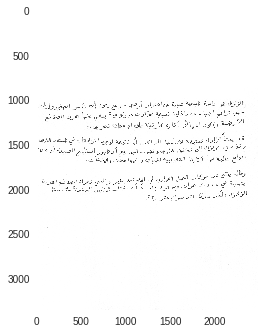

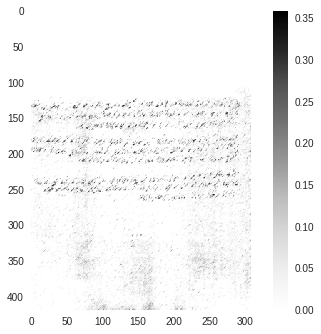

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
start = time.time()
img = cv2.cvtColor(cv2.imread("Try_image.jpg"),
                   cv2.COLOR_BGR2GRAY)

cell_size = (8, 8)  # h x w in pixels
block_size = (2, 2)  # h x w in cells
nbins = 9  # number of orientation bins

# winSize is the size of the image cropped to an multiple of the cell size
hog = cv2.HOGDescriptor(_winSize=(img.shape[1] // cell_size[1] * cell_size[1],
                                  img.shape[0] // cell_size[0] * cell_size[0]),
                        _blockSize=(block_size[1] * cell_size[1],
                                    block_size[0] * cell_size[0]),
                        _blockStride=(cell_size[1], cell_size[0]),
                        _cellSize=(cell_size[1], cell_size[0]),
                        _nbins=nbins)

n_cells = (img.shape[0] // cell_size[0], img.shape[1] // cell_size[1])
hog_feats = hog.compute(img)\
               .reshape(n_cells[1] - block_size[1] + 1,
                        n_cells[0] - block_size[0] + 1,
                        block_size[0], block_size[1], nbins) \
               .transpose((1, 0, 2, 3, 4))  # index blocks by rows first
# hog_feats now contains the gradient amplitudes for each direction,
# for each cell of its group for each group. Indexing is by rows then columns.

gradients = np.zeros((n_cells[0], n_cells[1], nbins))

# count cells (border cells appear less often across overlapping groups)
cell_count = np.full((n_cells[0], n_cells[1], 1), 0, dtype=int)

for off_y in range(block_size[0]):
    for off_x in range(block_size[1]):
        gradients[off_y:n_cells[0] - block_size[0] + off_y + 1,
                  off_x:n_cells[1] - block_size[1] + off_x + 1] += \
            hog_feats[:, :, off_y, off_x, :]
        cell_count[off_y:n_cells[0] - block_size[0] + off_y + 1,
                   off_x:n_cells[1] - block_size[1] + off_x + 1] += 1

end = time.time() - start
print(end)
print()
# Average gradients
gradients /= cell_count

# Preview
plt.figure()
plt.imshow(img, cmap='gray')
plt.show()

bin = 5  # angle is 360 / nbins * direction
plt.pcolor(gradients[:, :, bin])
plt.gca().invert_yaxis()
plt.gca().set_aspect('equal', adjustable='box')
plt.colorbar()
plt.show()
  

In [0]:
import os
import cv2
# from images import *
import time
folder = "451_475/"
print("ooie")
for file in os.listdir(folder):
  image = []
  img = cv2.imread(os.path.join(folder,file))
  if img is not None:
    image.append(img)
    
print("oohh!!------------")
print(len(image),len(image[0]),len(image[0][0]))  
print(image)
def createTrainingInstances(images):
  start = time.time()
  print("lol")
  hog = cv2.HOGDescriptor()
  instances = []
  print("io")
  for img in images:
    print("po")
    descriptor = hog.compute(img)
    if descriptor is None:
      descriptor = []
    else:
      descriptor = descriptor.ravel()
    print("yo")
  end = time.time() - start
  print ("HOG TRAIN SERIAL:", len(images) ," images ",  end) 

# from PIL import image
from matplotlib import pyplot
import matplotlib.image as mpimg 

# img = cv2.imread(os.path.join(folder,'Try_image.jpg'))
print("pop")
createTrainingInstances(image)

ooie
oohh!!------------
1 3383 2471
[array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255

In [0]:
%cd drive/My Drive/Colab Notebooks
%cd Assignments_sem7/IA_Project
!ls
# %cd 

[Errno 2] No such file or directory: 'drive/My Drive/Colab Notebooks'
/content
[Errno 2] No such file or directory: 'Assignments_sem7/IA_Project'
/content
sample_data


In [0]:
### Finding the contours of the image
import cv2
img = cv2.cvtColor(cv2.imread("Try_image.jpg"),
                   cv2.COLOR_BGR2GRAY)

x = cv2.findContours(img,mode=CV_RETR_LIST)
print(x)

In [0]:
import numpy as np
import cv2

im = cv2.imread('Try_image.jpg')
imgray = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
im2, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [0]:
print(im2)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [0]:
print(contours)

[array([[[   0,    0]],

       [[   0, 1079]],

       [[   1, 1079]],

       [[   2, 1080]],

       [[   1, 1081]],

       [[   0, 1081]],

       [[   0, 3352]],

       [[2470, 3352]],

       [[2470,    0]]], dtype=int32), array([[[1369, 2126]],

       [[1370, 2127]],

       [[1371, 2127]],

       [[1372, 2128]],

       [[1369, 2131]],

       [[1368, 2131]],

       [[1367, 2130]],

       [[1367, 2128]]], dtype=int32), array([[[1551, 2121]],

       [[1554, 2121]],

       [[1556, 2123]],

       [[1555, 2124]],

       [[1555, 2125]],

       [[1554, 2126]],

       [[1551, 2126]],

       [[1549, 2124]],

       [[1549, 2123]]], dtype=int32), array([[[1296, 2121]],

       [[1298, 2121]],

       [[1299, 2122]],

       [[1299, 2124]],

       [[1298, 2125]],

       [[1296, 2125]],

       [[1294, 2123]]], dtype=int32), array([[[1568, 2120]],

       [[1569, 2119]],

       [[1570, 2120]],

       [[1569, 2121]]], dtype=int32), array([[[1571, 2119]],

       [[1572, 21

In [0]:
contours=cv2.drawContours(im2, contours, -1, (0,255,0), 3)

In [0]:
print(contours)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [0]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt


x= np.arange(0,255,1)
plt.plot(len(contours[0]), norm.pdf(contours))

plt.show()


In [0]:
# his = cv2.calcHist([im2],[0],None,[256],[0,256])
# plt.hist(im2.ravel(),256,[0,256])
# print(his)
# plt.imshow(his)
# plt.xlim([0,256])
plt.show()

In [0]:
pdf =norm.pdf(contours)
print(pdf)

[[0.39894228 0.39894228 0.39894228 ... 0.39894228 0.39894228 0.39894228]
 [0.39894228 0.39894228 0.39894228 ... 0.39894228 0.39894228 0.39894228]
 [0.39894228 0.39894228 0.39894228 ... 0.39894228 0.39894228 0.39894228]
 ...
 [0.39894228 0.39894228 0.39894228 ... 0.39894228 0.39894228 0.39894228]
 [0.39894228 0.39894228 0.39894228 ... 0.39894228 0.39894228 0.39894228]
 [0.39894228 0.39894228 0.39894228 ... 0.39894228 0.39894228 0.39894228]]


In [0]:
print(len(contours),len(contours[0]))
print(len(im2),len(im2[0]))

3353 2471
3353 2471


In [0]:
plt.hist(pdff, bins = 256)

In [0]:
# arr = [0 for i in range(256)]
# for i in range(len(contours)):
#   for j in range(len(contours[0])):
#     arr[im2[i][j]] = contours[i][j]
# sam = np.array(arr)   

In [0]:
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.save('contour_hinge.npy',sam)